# LAPLACE'S EQUATION

Potential Mesh
[[ 20. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.  20.]
 [ 20.  59.  74.  81.  85.  86.  87.  87.  86.  85.  81.  74.  59.  20.]
 [ 20.  43.  57.  66.  71.  73.  75.  75.  73.  71.  66.  57.  43.  20.]
 [ 20.  35.  46.  54.  59.  62.  64.  64.  62.  59.  54.  46.  35.  20.]
 [ 20.  30.  39.  45.  50.  53.  54.  54.  53.  50.  45.  39.  30.  20.]
 [ 20.  27.  33.  38.  42.  44.  45.  45.  44.  42.  38.  33.  27.  20.]
 [ 20.  25.  29.  33.  35.  37.  38.  38.  37.  35.  33.  29.  25.  20.]
 [ 20.  23.  26.  28.  30.  31.  32.  32.  31.  30.  28.  26.  23.  20.]
 [ 20.  21.  23.  24.  25.  26.  26.  26.  26.  25.  24.  23.  21.  20.]
 [ 20.  20.  20.  20.  20.  21.  21.  21.  21.  20.  20.  20.  20.  20.]
 [ 20.  18.  17.  16.  16.  16.  16.  16.  16.  16.  16.  17.  18.  20.]
 [ 20.  15.  13.  11.  11.  11.  10.  10.  11.  11.  11.  13.  15.  20.]
 [ 20.  11.   7.   6.   6.   5.   5.   5.   5.   6.   6.   7.  11.  20.]
 [ 20.   0.   0.   0.   0.   0.   0.

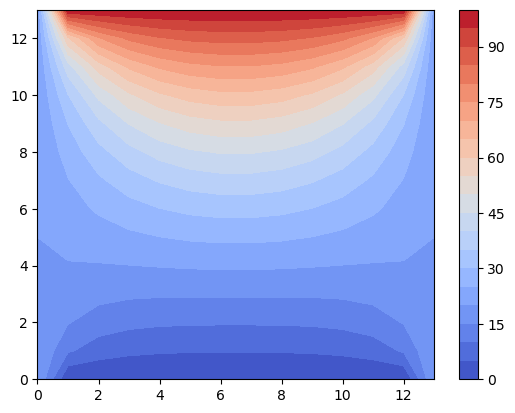

In [18]:
# Simple Numerical Laplace Equation Solution using Finite Difference Method 
import numpy as np
import matplotlib.pyplot as plt

# Set Dimension and delta 
lenX = lenY = 14
delta = 1

# Boundary condition 
Vtop = 100
Vbottom = 0
Vleft = 20
Vright = 20

# Initial guess of interior grid 
Vguess = 50

# Set colour interpolation and colour map 
colorinterpolation = 20
colourMap = plt.cm.coolwarm

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# Set array size and set the interior value with Tguess 
V = np.empty((lenX, lenY))
V1 = np.empty((lenX, lenY)) 
V.fill(Vguess)

# Set Boundary condition 
V[(lenY-1):, :] = Vtop 
V[:1, :] = Vbottom
V[:, (lenX-1):] = Vright 
V[:, :1] = Vleft


#Set Tsteady as zero to find out the convergence 
Vsteady=0

#set initial no of iteration as zero 
n=0

while True:
        acc=abs(Vsteady-Vguess) 
        if(acc<=0.000001):
             break 
        Vguess=Vsteady 
        n=n+1
        for i in range(1, lenX-1, delta):
              for j in range(1, lenY-1, delta):
 
                     V[i, j] = 0.25 * (V[i+1][j] + V[i-1][j] + V[i][j+1] + V[i][j-1])
                     Vsteady=V[i,j]

print('Potential Mesh') 
for i in range(0,lenX):
    V1[i,:]=V[(lenY-1)-i,:]

np.savetxt('suman-laplace.txt',V1,fmt='%.2f') 

print(np.around(V1, decimals=0))

print('Total no of Iteration : ',n)

# Configure the contour plt.title("Contour of Potential")
plt.contourf(X, Y, V, colorinterpolation, cmap=colourMap)

# Set Colorbar 
plt.colorbar() 
plt.show()
